#THEORETICAL

1. Can we use Bagging for regression ?

- Yes, Bagging (Bootstrap Aggregating) can absolutely be used for regression problems. While it's often discussed in the context of classification (e.g., Random Forests), the underlying principle of combining multiple models to reduce variance is equally applicable to regression.

Here's how it generally works for regression:

- Bootstrapping: Multiple subsets of the original training data are created by sampling with replacement. Each subset is the same size as the original dataset.
Base Regressors: A regression model (e.g., decision tree regressor, linear regression, etc.) is trained independently on each of these bootstrapped datasets.
- Aggregation: For a new input, each trained regressor predicts an output. Instead of taking a majority vote (as in classification), the final prediction for regression is typically the average (or sometimes the median) of the individual predictions from all the base regressors.

 Benefits for Regression:

- Reduced Variance: Bagging is most effective at reducing variance in models that are prone to overfitting, such as decision trees. By averaging predictions from multiple models, it smooths out the individual errors and reduces the sensitivity to the specific training data.
- Improved Generalization: The ensemble often generalizes better to unseen data compared to a single, unbagged model.

Example: Random Forest Regressor is a very popular bagging-based ensemble method specifically designed for regression (and classification) problems. It builds an ensemble of decision trees, where each tree is trained on a bootstrapped sample of the data and a random subset of features is considered at each split.

2.  What is the difference between multiple model training and single model training?
- The core difference between single model training and multiple model training (often referred to as ensemble methods) lies in their approach to learning and prediction:

Single Model Training:

- Concept: A single algorithm (e.g., a single decision tree, a linear regression model, a neural network) is trained on the entire dataset.
- Goal: To learn a single, optimal set of parameters or rules that best fit the training data and generalize to unseen data.
- Pros: Simplicity, easier to understand and interpret, faster training time, less computational resources.
- Cons: Highly susceptible to overfitting (especially with complex models like deep decision trees), can be sensitive to noise in the data, may not capture all the nuances or complexities of the data, and can have higher variance or bias depending on the model choice.

Examples: Logistic Regression, Support Vector Machines (SVM), individual Decision Trees, a single Neural Network.

Multiple Model Training (Ensemble Methods):

- Concept: Instead of training one model, multiple base models (often referred to as 'learners' or 'components') are trained, and their predictions are combined in some way to make a final prediction.
- Goal: To improve predictive performance, robustness, and reduce common issues like overfitting and high variance/bias by leveraging the 'wisdom of crowds'.
- Pros:
Reduced Variance: By averaging or combining predictions from multiple diverse models, the impact of random errors or noise that might affect a single model is reduced (e.g., Bagging).
- Reduced Bias: Some ensemble methods can effectively reduce bias by sequentially training models that correct the errors of previous ones (e.g., Boosting).
- Improved Accuracy: Often leads to higher predictive accuracy than any single base model.
- Robustness: More resistant to outliers and noise in the data.
- Cons: Increased complexity, harder to interpret the final model, longer training times, more computational resources, and can sometimes overfit if not tuned properly.

Types:
- Bagging (Bootstrap Aggregating): Trains multiple identical base models independently on different bootstrapped (resampled with replacement) subsets of the training data. Predictions are then averaged (for regression) or voted (for classification). Example: Random Forests.
- Boosting: Trains multiple models sequentially, where each new model tries to correct the errors made by the previous ones. The models are usually weighted based on their performance. Examples: AdaBoost, Gradient Boosting (GBM), XGBoost, LightGBM.
- Stacking: Trains multiple diverse base models, and then a meta-model (or 'blender') is trained on the predictions of these base models to make the final prediction.

3.  Explain the concept of feature randomness in Random Forest?

- Feature randomness, also known as feature bagging or random feature subsets, is a crucial aspect of Random Forests that contributes significantly to their performance and ability to reduce variance.

- In a traditional decision tree, at each split point, the algorithm typically considers all available features to find the best possible split. This can lead to trees that are highly correlated with each other, especially if a few very strong predictors dominate the dataset.

Random Forest introduces an additional layer of randomness on top of the bagging (bootstrap aggregating) of data samples:

- Bootstrapped Samples (Data Randomness): As in bagging, each tree in the Random Forest is trained on a different, randomly drawn subset of the training data (sampled with replacement).
- Random Feature Subsets (Feature Randomness): Crucially, at each node in a decision tree within the Random Forest, when deciding how to split the data, only a random subset of the total features is considered. The algorithm does not look at all features; it only picks from this smaller, random subset.

How it works and why it's important:

- Decorrelation of Trees: This random selection of features at each split is the primary mechanism by which Random Forests decorrelate the individual decision trees. If there's one or a few very strong predictor features in the dataset, a standard bagging approach (without feature randomness) might lead to all trees making their first split using these dominant features, resulting in highly similar trees. By forcing each tree to consider only a subset of features at each split, the Random Forest ensures that different trees explore different features and thus become more diverse. This diversity is key to reducing the overall variance of the ensemble.

- Reduced Overfitting: By reducing the correlation between trees, the ensemble becomes less prone to overfitting the training data.

- Improved Generalization: The combination of many diverse, relatively independent trees leads to a more robust and accurate overall model that generalizes better to unseen data.

- Computational Efficiency (sometimes): For datasets with a very large number of features, considering only a subset at each split can also speed up the tree-building process, though this is a secondary benefit.

Typical Implementation:

- For classification tasks, the number of features considered at each split is often set to the square root of the total number of features ($\sqrt{p}$$\sqrt{p}$). For example, if you have 100 features, only 10 would be considered at each split.
- For regression tasks, it's common to use one-third of the total features ($p/3$$p/3$).

In essence, feature randomness forces the individual decision trees to be more independent and diverse, preventing them from all relying on the same few strongest predictors, and thus leading to a more robust and better-performing ensemble model

4. What is OOB (Out-of-Bag) Score?
- The Out-of-Bag (OOB) score is a clever and computationally efficient way to estimate the generalization error of ensemble models like Random Forests (and other bagging methods) without needing a separate validation set.

Here's how it works:


- Bootstrapping and Out-of-Bag Samples: In bagging, each base estimator (e.g., a decision tree in a Random Forest) is trained on a bootstrap sample of the training data. A bootstrap sample is created by randomly sampling with replacement from the original dataset. Because of this sampling with replacement, some data points will be selected multiple times for a given bootstrap sample, while others will not be selected at all.

- The 'Out-of-Bag' Data: For each individual tree in the ensemble, the data points that were not included in its particular bootstrap sample are called its "out-of-bag" (OOB) samples. On average, about 36.8% of the original training data will be OOB for any single bootstrap sample.

- OOB Prediction: Instead of evaluating a tree on the data it was trained on (which would lead to an overly optimistic estimate due to overfitting), the OOB score utilizes these unused samples. For each data point in the original training set, it collects predictions only from the trees for which that data point was OOB.

Aggregation for OOB Score:

- For Classification: For a given OOB sample, the class prediction is determined by a majority vote among the trees for which that sample was OOB.
For Regression: For a given OOB sample, the prediction is typically the average of the predictions from the trees for which that sample was OOB.
Calculating the OOB Score: Once these OOB predictions are made for all data points in the original training set (using only the trees where they were OOB), an overall accuracy score (for classification) or mean squared error (for regression) is calculated by comparing these OOB predictions against the actual target values. This score is the OOB score.

Why is it useful?

- Unbiased Error Estimate: The OOB error estimate is considered to be as accurate as using a separate test set of the same size as the training set, but it uses all the data for training at some point.
- No Need for a Validation Set: It eliminates the need to set aside a separate validation set, allowing you to use all your data for training and still get a reliable performance estimate.
- Computational Efficiency: It comes almost "for free" during the training process, as the OOB predictions are generated as a byproduct of building the trees.

5. How can you measure the importance of features in a Random Forest model?
-  how to measure feature importance in a Random Forest model:

  There are two primary methods:

- Mean Decrease in Impurity (MDI) / Gini Importance:

  - Concept: Measures how much each feature reduces impurity (e.g., Gini impurity or MSE) when used for splitting nodes across all trees in the forest. Features that lead to larger impurity reductions are deemed more important.
  - Pros: Efficient, built-in to many Random Forest implementations.
  - Cons: Can be biased towards high-cardinality features or correlated features; doesn't directly measure impact on model performance.
- Permutation Importance:

  - Concept: Measures the decrease in the model's performance (e.g., accuracy, R-squared) when the values of a single feature are randomly shuffled. A significant performance drop indicates high importance.
  - Pros: Model-agnostic, directly relates to actual model performance, generally less biased than MDI.
  - Cons: Computationally more expensive, can still be tricky with highly correlated features.


In short: MDI is quick but can be biased. Permutation Importance is more reliable for understanding predictive power but takes longer to compute.

6. Explain the working principle of a Bagging Classifier?
- A Bagging Classifier combines predictions from multiple base classifiers to reduce variance and improve accuracy. It works in three main steps:

- Bootstrap Sampling: Creates multiple diverse training sets by sampling with replacement from the original data.
- Base Classifier Training: Trains an independent base classifier (e.g., decision tree) on each of these bootstrapped samples.
- Aggregation: For classification, the final prediction is determined by a majority vote among all base classifiers.

- Key Benefits: Primarily reduces variance and improves the generalization ability of the model by averaging out the errors of individual, diverse models.

7.  How do you evaluate a Bagging Classifier’s performance?
- To evaluate a Bagging Classifier's performance, you typically use standard classification metrics. These are similar to how you would evaluate any other classification model:

- Accuracy: The proportion of correctly classified instances.
- Precision: The proportion of positive identifications that were actually correct.
- Recall (Sensitivity): The proportion of actual positives that were identified correctly.
- F1-Score: The harmonic mean of precision and recall, providing a balance between the two.
- Confusion Matrix: A table that visualizes the performance of a classification algorithm, showing true positives, true negatives, false positives, and false negatives.
- ROC Curve and AUC: The Receiver Operating Characteristic (ROC) curve plots the true positive rate against the false positive rate at various threshold settings. The Area Under the Curve (AUC) provides a single metric to summarize the curve's performance.

Additionally, for bagging models like Random Forests, the Out-of-Bag (OOB) Score is a very useful internal evaluation metric. As mentioned in the notebook (point 4), the OOB score provides an unbiased estimate of the generalization error without the need for a separate validation set.

8.  How does a Bagging Regressor work?
- A Bagging Regressor works by combining predictions from multiple individual regression models to reduce variance and improve the overall prediction accuracy. Here's a breakdown of its working principle:

1. Bootstrapping: It starts by creating multiple, diverse subsets of the original training data. This is done by 'sampling with replacement,' meaning some data points might appear multiple times in a subset, while others might not appear at all.

2. Base Regressors: For each of these bootstrapped datasets, an independent regression model (often a decision tree regressor, but it could be any regression model) is trained. Each of these models learns slightly different patterns due to the variations in their training data.

3. Aggregation: When a new, unseen input comes in, each of the trained base regressors makes a prediction. Instead of a majority vote (as in classification), the final prediction for regression is typically the average (or sometimes the median) of all the individual predictions from these base regressors.

This process effectively smooths out the individual errors and reduces the sensitivity of the overall model to the specific training data, leading to a more robust and generalized prediction. A prime example is the Random Forest Regressor.

9.  What is the main advantage of ensemble techniques?
- The main advantage of ensemble techniques lies in their ability to improve predictive performance, robustness, and reduce common issues like overfitting and high variance/bias by leveraging the 'wisdom of crowds'.

 They achieve this through several benefits:

- Reduced Variance: By combining predictions from multiple diverse models, the impact of random errors or noise that might affect a single model is significantly reduced.
- Reduced Bias: Some ensemble methods can effectively reduce bias by sequentially training models that correct the errors of previous ones.
- Improved Accuracy: They often lead to higher predictive accuracy than any single base model.
- Robustness: Ensemble models are generally more resistant to outliers and noise in the data.

10.  What is the main challenge of ensemble methods?
- The main challenges of ensemble methods are:

- Increased Complexity: They are generally more complex than single models.
- Harder Interpretability: Understanding the contributions of individual models to the final prediction can be difficult.
- Longer Training Times: Training multiple models can be computationally expensive and time-consuming.
- Higher Computational Resources: They require more memory and processing power.
- Potential Overfitting: If not tuned properly, they can still overfit the training data.

11. Explain the key idea behind ensemble techniques?
- The key idea behind ensemble techniques, in short, is:

  - Combine Multiple Models: Instead of training one model, multiple base models are trained.
  - Leverage 'Wisdom of Crowds': Their predictions are combined to make a final prediction.
  - Improve Performance: The primary goal is to improve predictive performance, robustness, and reduce common issues like overfitting, high variance, and bias.
  - Achieve Diversity: This is often achieved by introducing diversity in the models (e.g., through different data subsets, different features, or sequential error correction).

12. What is a Random Forest Classifier?
- A Random Forest Classifier is an ensemble learning method specifically designed for classification tasks. It operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) of the individual trees.

It leverages two key concepts:

- Bagging (Bootstrap Aggregating): Each tree in the forest is trained on a different, randomly drawn subset of the training data (sampled with replacement).
- Feature Randomness: At each node in a decision tree within the Random Forest, when deciding how to split the data, only a random subset of the total features is considered, rather than all of them.

These two forms of randomness help to decorrelate the individual decision trees, leading to a more robust, accurate, and less overfit model than a single decision tree.

13. What are the main types of ensemble techniques?
- The main types of ensemble techniques are:

  - Bagging (Bootstrap Aggregating): Trains multiple identical base models independently on different bootstrapped (resampled with replacement) subsets of the training data. Predictions are then averaged (for regression) or voted (for classification). A prime example is Random Forests.
   - Boosting: Trains multiple models sequentially, where each new model tries to correct the errors made by the previous ones. The models are usually weighted based on their performance. Examples include AdaBoost, Gradient Boosting (GBM), XGBoost, and LightGBM.
   - Stacking: Trains multiple diverse base models, and then a meta-model (or 'blender') is trained on the predictions of these base models to make the final prediction.

14. What is ensemble learning in machine learning?
-  Ensemble learning in machine learning is a technique where instead of training a single model, multiple base models (often called 'learners' or 'components') are trained, and their individual predictions are then combined to make a final prediction. The main idea is to leverage the 'wisdom of crowds' to improve overall predictive performance, increase robustness, and reduce common issues like overfitting, high variance, or high bias that a single model might exhibit.

15. When should we avoid using ensemble methods?
- While ensemble methods are powerful, there are situations where avoiding them might be beneficial or necessary:
16. How does Bagging help in reducing overfitting?
- Bagging (Bootstrap Aggregating) primarily helps in reducing overfitting by reducing the variance of a model. Here's how it works:

  - Averaging out noise: By training multiple base models (e.g., decision trees) on different bootstrapped subsets of the data, each model learns slightly different patterns and might make different errors on specific data points. When their predictions are combined (averaged for regression, majority vote for classification), the random errors and noise introduced by individual models tend to cancel each other out. This reduces the overall variance of the ensemble.
  - Increased Stability: A single complex model, like a deep decision tree, can be highly sensitive to the specific training data and small changes can lead to very different trees, making it prone to overfitting. Bagging makes the overall model more stable and less sensitive to the nuances of any single training dataset. Since each tree sees a slightly different version of the data, the ensemble's prediction is more robust to variations in the training set.
  - Decorrelation (especially with feature randomness in Random Forests): While basic bagging helps, Random Forests further enhance this by introducing feature randomness (considering only a random subset of features at each split). This ensures that individual trees are not overly correlated, even if a few strong predictors exist. Decorrelating the trees further amplifies the variance reduction benefits of bagging.
In essence, by creating multiple diverse models and combining their predictions, Bagging effectively smooths out the individual errors and reduces the sensitivity to the specific training data, leading to a more generalized and less overfit model.

17. Why is Random Forest better than a single Decision Tree?
- Reduced Overfitting: Single decision trees easily overfit. Random Forests combine many trees trained on different data subsets and features, averaging out individual tree errors and reducing overall variance.
- Improved Generalization: By decorrelating individual trees (through bagging and feature randomness), Random Forests generalize much better to new, unseen data.
- Increased Robustness: They are more resilient to outliers and noise in the data, as anomalies affecting one tree are typically balanced out by others.
Handles High-Dimensional Data: Feature randomness allows Random Forests to effectively manage datasets with many features, implicitly performing some feature selection.

18. What is the role of bootstrap sampling in Bagging?
- The role of bootstrap sampling in Bagging is crucial and serves several key purposes:

  - Creating Diverse Training Sets: Bootstrap sampling (sampling with replacement) creates multiple, slightly different subsets of the original training data. Each base model in the ensemble is trained on one of these unique bootstrapped samples.
  - Introducing Randomness/Diversity: By training on different subsets, each base model learns slightly different patterns and relationships from the data. This intentional randomness ensures that the individual models are diverse and not highly correlated with each other.
  - Reducing Variance: The diversity introduced by bootstrap sampling allows the ensemble to reduce variance. When the predictions of these diverse models are combined (e.g., averaged for regression, majority vote for classification), the individual errors and noise tend to cancel each other out, leading to a more stable and accurate overall prediction.
  - Enabling Out-of-Bag (OOB) Evaluation: A significant benefit of bootstrap sampling is that for each base model, approximately one-third of the original data points are left out of its training set. These 'out-of-bag' samples can then be used to evaluate the model's performance internally without needing a separate validation set, providing an unbiased estimate of generalization error.

19. What are some real-world applications of ensemble techniques?
- Ensemble techniques are widely used across various domains due to their improved performance and robustness. Some real-world applications include:

  - Fraud Detection: Identifying fraudulent transactions in banking and financial services by combining multiple models that look for different patterns of suspicious activity.
  - Medical Diagnosis: Assisting in the diagnosis of diseases (e.g., cancer detection from medical images) by combining the predictions of several diagnostic models to achieve higher accuracy.
  - Recommendation Systems: Powering recommendation engines (e.g., for movies, products, or news) by leveraging diverse user and item features and combining predictions from various recommendation algorithms.
  - Image and Speech Recognition: Used in advanced computer vision tasks (e.g., facial recognition, object detection) and natural language processing (e.g., speech-to-text, sentiment analysis) where deep learning ensembles often achieve state-of-the-art results.
  - Customer Churn Prediction: Predicting which customers are likely to discontinue using a service, allowing companies to proactively engage with them.
  - Credit Scoring: Assessing the creditworthiness of individuals or businesses to make lending decisions more accurately.
  - Weather Forecasting: Improving the accuracy of weather predictions by combining outputs from different meteorological models.

  - Financial Market Prediction: Forecasting stock prices, market trends, or other financial indicators, though this remains a highly challenging area.
  - Autonomous Driving: Contributing to decision-making processes in self-driving cars, combining outputs from various sensors and perception models.
  - Cybersecurity: Detecting malware, intrusions, and other cyber threats by combining different anomaly detection and classification algorithms.

20. What is the difference between Bagging and Boosting?

 The main differences between Bagging and Boosting, two prominent ensemble techniques, can be summarized as follows:

- Sequential vs. Parallel Training:

   - Bagging: Trains base models in parallel (independently of each other) on different bootstrapped subsets of the data.
  - Boosting: Trains base models sequentially, where each subsequent model learns from the errors of the previous one.

- Focus of Error Reduction:

   - Bagging: Primarily aims to reduce variance by averaging out the errors of multiple diverse models.
   - Boosting: Primarily aims to reduce bias by focusing on correcting misclassified instances or samples with higher errors from previous models.

- Weighting of Samples:

   - Bagging: Each sample has an equal chance of being selected for each bootstrap sample (initially).
   - Boosting: Assigns weights to training samples, with incorrectly predicted samples receiving higher weights for subsequent models to focus on.

- Model Complexity:

   - Bagging: Often uses complex, low-bias, high-variance base models (e.g., deep decision trees) that can overfit if used alone.
   - Boosting: Typically uses simple, weak learners (e.g., shallow decision trees or stumps) as base models.

- Final Prediction Aggregation:

   - Bagging: Predictions are combined by averaging (for regression) or majority voting (for classification).
   - Boosting: Predictions are combined using a weighted average or sum, where stronger models (or models that performed better) contribute more.

Examples:

Bagging: Random Forests
Boosting: AdaBoost, Gradient Boosting Machines (GBM), XGBoost, LightGBM


#PRACTICAL

21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Initialize a base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier(random_state=42)

# 3. Initialize the Bagging Classifier
# n_estimators: number of base estimators in the ensemble
bagging_classifier = BaggingClassifier(estimator=base_estimator, n_estimators=10, random_state=42)

# 4. Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# 6. Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")

Bagging Classifier Accuracy: 0.8967


 22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

In [4]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Generate a sample regression dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# 2. Initialize a base estimator (Decision Tree Regressor)
base_estimator_reg = DecisionTreeRegressor(random_state=42)

# 3. Initialize the Bagging Regressor
bagging_regressor = BaggingRegressor(estimator=base_estimator_reg, n_estimators=10, random_state=42)

# 4. Train the Bagging Regressor
bagging_regressor.fit(X_train_reg, y_train_reg)

# 5. Make predictions on the test set
y_pred_reg = bagging_regressor.predict(X_test_reg)

# 6. Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Bagging Regressor Mean Squared Error: {mse:.4f}")

Bagging Regressor Mean Squared Error: 249.6254


23.Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target

# Split data into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

# 2. Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. Train the Random Forest Classifier
rf_classifier.fit(X_train_bc, y_train_bc)

# 4. Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a pandas Series for better visualization
feature_names = breast_cancer.feature_names
feature_importance_df = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# 5. Print feature importance scores
print("Feature Importance Scores (Random Forest Classifier):")
print(feature_importance_df)

Feature Importance Scores (Random Forest Classifier):
mean concave points        0.141934
worst concave points       0.127136
worst area                 0.118217
mean concavity             0.080557
worst radius               0.077975
worst perimeter            0.074292
mean perimeter             0.060092
mean area                  0.053810
worst concavity            0.041080
mean radius                0.032312
area error                 0.029538
worst texture              0.018786
worst compactness          0.017539
radius error               0.016435
worst symmetry             0.012929
perimeter error            0.011770
worst smoothness           0.011769
mean texture               0.011064
mean compactness           0.009216
fractal dimension error    0.007135
worst fractal dimension    0.006924
mean smoothness            0.006223
smoothness error           0.005881
concavity error            0.005816
compactness error          0.004596
symmetry error             0.004001
concave po

24. Train a Random Forest Regressor and compare its performance with a single Decision Tree

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Generate a sample regression dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# 2. Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# 3. Initialize and train a single Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_reg, y_train_reg)

# Make predictions and calculate MSE for Decision Tree
y_pred_dt = dt_regressor.predict(X_test_reg)
mse_dt = mean_squared_error(y_test_reg, y_pred_dt)

# 4. Initialize and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

# Make predictions and calculate MSE for Random Forest
y_pred_rf = rf_regressor.predict(X_test_reg)
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)

# 5. Print the MSE for comparison
print(f"Decision Tree Regressor Mean Squared Error: {mse_dt:.4f}")
print(f"Random Forest Regressor Mean Squared Error: {mse_rf:.4f}")

Decision Tree Regressor Mean Squared Error: 599.9199
Random Forest Regressor Mean Squared Error: 209.3406


25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target

# Split data into training and testing sets (though OOB doesn't strictly need a test set, it's good practice)
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier with oob_score=True
# The oob_score calculates the out-of-bag accuracy during fitting
rf_classifier_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

# Train the Random Forest Classifier
rf_classifier_oob.fit(X_train_bc, y_train_bc)

# Print the Out-of-Bag Score
print(f"Random Forest OOB Score: {rf_classifier_oob.oob_score_:.4f}")

Random Forest OOB Score: 0.9548


26.  Train a Bagging Classifier using SVM as a base estimator and print accuracy


In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Generate a sample classification dataset
X_svm, y_svm = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# Split data into training and testing sets
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.3, random_state=42)

# 2. Initialize a base estimator (Support Vector Classifier - SVC)
# Using a linear kernel for simplicity and faster training, but other kernels can be used.
base_estimator_svm = SVC(kernel='linear', random_state=42, probability=True) # probability=True is often needed for BaggingClassifier, though not strictly for SVC alone

# 3. Initialize the Bagging Classifier with the SVM as base estimator
# n_estimators: number of base estimators in the ensemble
bagging_classifier_svm = BaggingClassifier(estimator=base_estimator_svm, n_estimators=10, random_state=42)

# 4. Train the Bagging Classifier
bagging_classifier_svm.fit(X_train_svm, y_train_svm)

# 5. Make predictions on the test set
y_pred_svm = bagging_classifier_svm.predict(X_test_svm)

# 6. Calculate and print the accuracy
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
print(f"Bagging Classifier with SVM Accuracy: {accuracy_svm:.4f}")

Bagging Classifier with SVM Accuracy: 0.7933


27. Train a Random Forest Classifier with different numbers of trees and compare accuracy

Random Forest Classifier with 10 trees: Accuracy = 0.9649
Random Forest Classifier with 50 trees: Accuracy = 0.9708
Random Forest Classifier with 100 trees: Accuracy = 0.9708
Random Forest Classifier with 200 trees: Accuracy = 0.9708
Random Forest Classifier with 500 trees: Accuracy = 0.9708


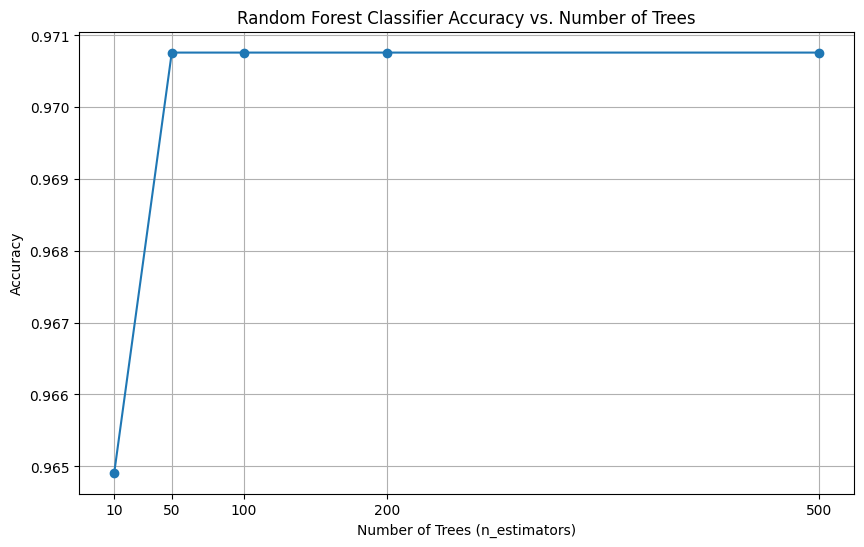

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target

# 2. Split the data into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

# 3. Define a list of n_estimators values to experiment with
n_estimators_list = [10, 50, 100, 200, 500]

# 4. Initialize empty lists to store the accuracies and n_estimators values
accuracies = []

# 5. Loop through each n_estimators value
for n_estimators in n_estimators_list:
    # Initialize a RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Train the classifier
    rf_classifier.fit(X_train_bc, y_train_bc)

    # Make predictions on the test data
    y_pred_bc = rf_classifier.predict(X_test_bc)

    # Calculate the accuracy score and store it
    accuracy = accuracy_score(y_test_bc, y_pred_bc)
    accuracies.append(accuracy)
    print(f"Random Forest Classifier with {n_estimators} trees: Accuracy = {accuracy:.4f}")

# 6. Create a line plot of accuracy vs. number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracies, marker='o', linestyle='-')
plt.title('Random Forest Classifier Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(n_estimators_list)
plt.show()

28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# 1. Generate a sample classification dataset
X_lr, y_lr = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# Split data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.3, random_state=42)

# 2. Initialize a base estimator (Logistic Regression)
base_estimator_lr = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' solver for small datasets and L1/L2 regularization

# 3. Initialize the Bagging Classifier with Logistic Regression as base estimator
bagging_classifier_lr = BaggingClassifier(estimator=base_estimator_lr, n_estimators=10, random_state=42)

# 4. Train the Bagging Classifier
bagging_classifier_lr.fit(X_train_lr, y_train_lr)

# 5. Make predictions (probabilities) on the test set for AUC calculation
y_pred_proba_lr = bagging_classifier_lr.predict_proba(X_test_lr)[:, 1] # Get probabilities for the positive class

# 6. Calculate and print the AUC score
auc_score = roc_auc_score(y_test_lr, y_pred_proba_lr)
print(f"Bagging Classifier with Logistic Regression AUC Score: {auc_score:.4f}")

Bagging Classifier with Logistic Regression AUC Score: 0.8415


29. Train a Random Forest Regressor and analyze feature importance scores

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Generate a sample regression dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Split data into training and testing sets (not strictly needed for feature importance, but good practice)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# 2. Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# 3. Train the Random Forest Regressor
rf_regressor.fit(X_train_reg, y_train_reg)

# 4. Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a pandas Series for better visualization and sorting
# We'll use generic feature names since make_regression doesn't provide them
feature_names = [f'feature_{i}' for i in range(X_reg.shape[1])]
feature_importance_df = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# 5. Print feature importance scores
print("Feature Importance Scores (Random Forest Regressor):")
print(feature_importance_df)


Feature Importance Scores (Random Forest Regressor):
feature_9    0.743103
feature_7    0.203907
feature_1    0.014790
feature_8    0.011872
feature_2    0.007288
feature_0    0.004422
feature_6    0.004111
feature_4    0.003928
feature_5    0.003664
feature_3    0.002915
dtype: float64


30. Train an ensemble model using both Bagging and Random Forest and compare accuracy

In [20]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Train a Bagging Classifier (using Decision Trees as base estimator)
base_estimator_bagging = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(estimator=base_estimator_bagging, n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# 3. Train a Random Forest Classifier
# Random Forest is essentially Bagging with an additional feature randomness
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)
y_pred_rf = random_forest_classifier.predict(X_test)
accuracy_rf = accuracy_forest = accuracy_score(y_test, y_pred_rf)

# 4. Print and compare accuracies
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")

if accuracy_rf > accuracy_bagging:
    print("\nRandom Forest Classifier performed better than Bagging Classifier.")
elif accuracy_bagging > accuracy_rf:
    print("\nBagging Classifier performed better than Random Forest Classifier.")
else:
    print("\nBoth classifiers performed equally.")

Bagging Classifier Accuracy: 0.9200
Random Forest Classifier Accuracy: 0.9300

Random Forest Classifier performed better than Bagging Classifier.


31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target

# 2. Split the dataset into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

# 3. Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20]
}

# 4. Initialize a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# 5. Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# 6. Fit the GridSearchCV object to the training data
print("Starting GridSearchCV...")
grid_search.fit(X_train_bc, y_train_bc)
print("GridSearchCV completed.")

# 7. Print the best parameters and best cross-validation score
print("\nBest parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# 8. Get the best estimator and evaluate on the test set
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test_bc)
test_accuracy = accuracy_score(y_test_bc, y_pred_best)
print("Test set accuracy with best model:", test_accuracy)

Starting GridSearchCV...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
GridSearchCV completed.

Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Best cross-validation accuracy: 0.9522151898734176
Test set accuracy with best model: 0.9707602339181286


32. Train a Bagging Regressor with different numbers of base estimators and compare performance

Bagging Regressor with 1 estimators: MSE = 695.3794
Bagging Regressor with 5 estimators: MSE = 301.4608
Bagging Regressor with 10 estimators: MSE = 249.6254
Bagging Regressor with 20 estimators: MSE = 225.5498
Bagging Regressor with 50 estimators: MSE = 218.6192
Bagging Regressor with 100 estimators: MSE = 211.5435
Bagging Regressor with 200 estimators: MSE = 208.8188
Bagging Regressor with 500 estimators: MSE = 205.8921


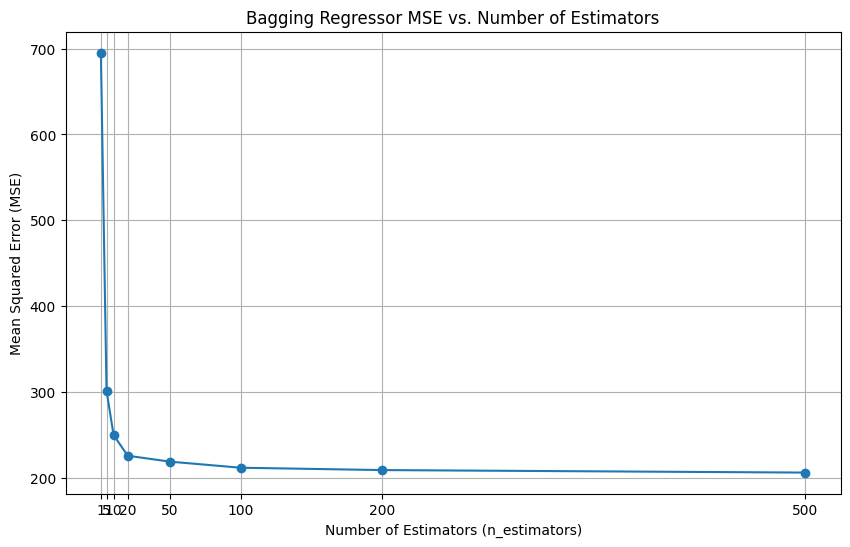

In [25]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Generate a sample regression dataset
X_reg_compare, y_reg_compare = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# 2. Split data into training and testing sets
X_train_reg_compare, X_test_reg_compare, y_train_reg_compare, y_test_reg_compare = train_test_split(X_reg_compare, y_reg_compare, test_size=0.3, random_state=42)

# 3. Define a list of n_estimators values to experiment with
n_estimators_list_reg = [1, 5, 10, 20, 50, 100, 200, 500]

# 4. Initialize an empty list to store the MSE scores
mse_scores = []

# 5. Loop through each n_estimators value
for n_estimators in n_estimators_list_reg:
    # Initialize a base estimator (Decision Tree Regressor)
    base_estimator_reg = DecisionTreeRegressor(random_state=42)

    # Initialize the Bagging Regressor
    bagging_regressor = BaggingRegressor(estimator=base_estimator_reg, n_estimators=n_estimators, random_state=42)

    # Train the Bagging Regressor
    bagging_regressor.fit(X_train_reg_compare, y_train_reg_compare)

    # Make predictions on the test set
    y_pred_reg_compare = bagging_regressor.predict(X_test_reg_compare)

    # Calculate the Mean Squared Error and store it
    mse = mean_squared_error(y_test_reg_compare, y_pred_reg_compare)
    mse_scores.append(mse)
    print(f"Bagging Regressor with {n_estimators} estimators: MSE = {mse:.4f}")

# 6. Create a line plot of MSE vs. number of estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list_reg, mse_scores, marker='o', linestyle='-')
plt.title('Bagging Regressor MSE vs. Number of Estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.xticks(n_estimators_list_reg)
plt.show()

33. Train a Random Forest Classifier and analyze misclassified samples

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Breast Cancer dataset (already done in previous cells, but re-loading for completeness)
breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target

# Split data into training and testing sets (already done in previous cells)
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier (already done in previous cells)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_bc, y_train_bc)

# Make predictions on the test set (already done in previous cells)
y_pred_bc = rf_classifier.predict(X_test_bc)

# Calculate and print the overall accuracy (already done in previous cells)
accuracy = accuracy_score(y_test_bc, y_pred_bc)
print(f"Overall Random Forest Classifier Accuracy: {accuracy:.4f}\n")

# 7. Identify the indices of the misclassified samples
misclassified_indices = np.where(y_test_bc != y_pred_bc)[0]

# 8. Print details of misclassified samples
print("Misclassified Samples Details:")
for i, idx in enumerate(misclassified_indices):
    print(f"\n--- Misclassified Sample {i+1} (Test Set Index: {idx}) ---")
    print("Features:")
    for feature_name, feature_value in zip(breast_cancer.feature_names, X_test_bc[idx]):
        print(f"  {feature_name}: {feature_value:.4f}")
    true_label_name = breast_cancer.target_names[y_test_bc[idx]]
    predicted_label_name = breast_cancer.target_names[y_pred_bc[idx]]
    print(f"True Label: {true_label_name} ({y_test_bc[idx]}) - Predicted Label: {predicted_label_name} ({y_pred_bc[idx]})")

Overall Random Forest Classifier Accuracy: 0.9708

Misclassified Samples Details:

--- Misclassified Sample 1 (Test Set Index: 8) ---
Features:
  mean radius: 13.3400
  mean texture: 15.8600
  mean perimeter: 86.4900
  mean area: 520.0000
  mean smoothness: 0.1078
  mean compactness: 0.1535
  mean concavity: 0.1169
  mean concave points: 0.0699
  mean symmetry: 0.1942
  mean fractal dimension: 0.0690
  radius error: 0.2860
  texture error: 1.0160
  perimeter error: 1.5350
  area error: 12.9600
  smoothness error: 0.0068
  compactness error: 0.0357
  concavity error: 0.0398
  concave points error: 0.0138
  symmetry error: 0.0213
  fractal dimension error: 0.0046
  worst radius: 15.5300
  worst texture: 23.1900
  worst perimeter: 96.6600
  worst area: 614.9000
  worst smoothness: 0.1536
  worst compactness: 0.4791
  worst concavity: 0.4858
  worst concave points: 0.1708
  worst symmetry: 0.3527
  worst fractal dimension: 0.1016
True Label: benign (1) - Predicted Label: malignant (0)

---

34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize and train a single Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions and calculate accuracy for Decision Tree
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")

# 4. Initialize and train a Bagging Classifier
# Use the same Decision Tree Classifier as the base estimator
bagging_classifier = BaggingClassifier(estimator=dt_classifier, n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Make predictions and calculate accuracy for Bagging Classifier
y_pred_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")

# 5. Compare accuracies
if accuracy_bagging > accuracy_dt:
    print("\nBagging Classifier performed better than the single Decision Tree Classifier.")
elif accuracy_dt > accuracy_bagging:
    print("\nSingle Decision Tree Classifier performed better than the Bagging Classifier.")
else:
    print("\nBoth classifiers performed equally.")

Decision Tree Classifier Accuracy: 0.8867
Bagging Classifier Accuracy: 0.9200

Bagging Classifier performed better than the single Decision Tree Classifier.


35. Train a Random Forest Classifier and visualize the confusion matrix

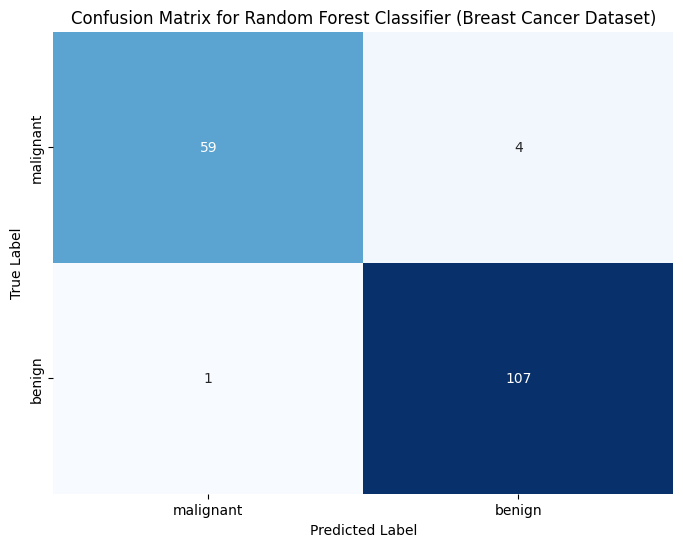


--- Model Performance Summary based on Confusion Matrix ---
True Negatives (Correctly predicted 'malignant'): 59
False Positives (Predicted 'malignant' but was 'benign'): 4
False Negatives (Predicted 'benign' but was 'malignant'): 1
True Positives (Correctly predicted 'benign'): 107

Accuracy: 0.9708
Precision (for 'benign' class): 0.9640
Recall (for 'benign' class): 0.9907
F1-Score (for 'benign' class): 0.9772

Interpretation:
- The model correctly identified 107 'benign' cases and 59 'malignant' cases.
- It made 4 false positive error(s) (predicted 'malignant' when it was 'benign').
- It made 1 false negative error(s) (predicted 'benign' when it was 'malignant').
The low number of false negatives is particularly important in medical diagnosis, indicating the model is good at not missing actual malignant cases.


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target

# 2. Split data into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

# 3. Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_bc, y_train_bc)

# 4. Make predictions on the test set
y_pred_bc = rf_classifier.predict(X_test_bc)

# 5. Calculate the Confusion Matrix
cm = confusion_matrix(y_test_bc, y_pred_bc)

# 6. Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=breast_cancer.target_names,
            yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier (Breast Cancer Dataset)')
plt.show()

# 7. Summarize performance based on Confusion Matrix
true_negatives = cm[0, 0]
false_positives = cm[0, 1]
false_negatives = cm[1, 0]
true_positives = cm[1, 1]

print("\n--- Model Performance Summary based on Confusion Matrix ---")
print(f"True Negatives (Correctly predicted '{breast_cancer.target_names[0]}'): {true_negatives}")
print(f"False Positives (Predicted '{breast_cancer.target_names[0]}' but was '{breast_cancer.target_names[1]}'): {false_positives}")
print(f"False Negatives (Predicted '{breast_cancer.target_names[1]}' but was '{breast_cancer.target_names[0]}'): {false_negatives}")
print(f"True Positives (Correctly predicted '{breast_cancer.target_names[1]}'): {true_positives}")

accuracy = accuracy_score(y_test_bc, y_pred_bc)
precision = precision_score(y_test_bc, y_pred_bc)
recall = recall_score(y_test_bc, y_pred_bc)
f1 = f1_score(y_test_bc, y_pred_bc)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision (for '{breast_cancer.target_names[1]}' class): {precision:.4f}")
print(f"Recall (for '{breast_cancer.target_names[1]}' class): {recall:.4f}")
print(f"F1-Score (for '{breast_cancer.target_names[1]}' class): {f1:.4f}")

print("\nInterpretation:")
print(f"- The model correctly identified {true_positives} '{breast_cancer.target_names[1]}' cases and {true_negatives} '{breast_cancer.target_names[0]}' cases.")
print(f"- It made {false_positives} false positive error(s) (predicted '{breast_cancer.target_names[0]}' when it was '{breast_cancer.target_names[1]}').")
print(f"- It made {false_negatives} false negative error(s) (predicted '{breast_cancer.target_names[1]}' when it was '{breast_cancer.target_names[0]}').")
print("The low number of false negatives is particularly important in medical diagnosis, indicating the model is good at not missing actual malignant cases.")

36.  Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

In [29]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target

# 2. Split the dataset into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

# 3. Initialize base estimators
dt_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(kernel='linear', random_state=42, probability=True) # probability=True for StackingClassifier
lr_clf = LogisticRegression(solver='liblinear', random_state=42)

# 4. Create a list of estimators for StackingClassifier
estimators = [
    ('dt', dt_clf),
    ('svm', svm_clf),
    ('lr', lr_clf)
]

# 5. Initialize the StackingClassifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42))

# 6. Train the Stacking Classifier
print("Training Stacking Classifier...")
stacking_clf.fit(X_train_bc, y_train_bc)
print("Stacking Classifier training complete.")

# 7. Make predictions on the test set
y_pred_stacking = stacking_clf.predict(X_test_bc)

# 8. Calculate and print the accuracy
accuracy_stacking = accuracy_score(y_test_bc, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {accuracy_stacking:.4f}")

Training Stacking Classifier...
Stacking Classifier training complete.
Stacking Classifier Accuracy: 0.9766


37. Train a Random Forest Classifier and print the top 5 most important features

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target

# Split data into training and testing sets (good practice, though not strictly needed for feature importance extraction)
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

# 2. Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_bc, y_train_bc)

# 3. Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a pandas Series for better visualization and sorting
feature_names = breast_cancer.feature_names
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# Sort features by importance in descending order and get the top 5
top_5_features = feature_importance_series.sort_values(ascending=False).head(5)

# 4. Print the top 5 most important features
print("Top 5 Most Important Features (Random Forest Classifier):")
print(top_5_features)

Top 5 Most Important Features (Random Forest Classifier):
mean concave points     0.141934
worst concave points    0.127136
worst area              0.118217
mean concavity          0.080557
worst radius            0.077975
dtype: float64


38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize a base estimator (Decision Tree Classifier)
base_estimator = DecisionTreeClassifier(random_state=42)

# 4. Initialize the Bagging Classifier
# n_estimators: number of base estimators in the ensemble
bagging_classifier = BaggingClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

# 5. Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# 7. Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 8. Print the calculated metrics
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")
print(f"Bagging Classifier Precision: {precision:.4f}")
print(f"Bagging Classifier Recall: {recall:.4f}")
print(f"Bagging Classifier F1-score: {f1:.4f}")

Bagging Classifier Accuracy: 0.9200
Bagging Classifier Precision: 0.8919
Bagging Classifier Recall: 0.9429
Bagging Classifier F1-score: 0.9167


39.  Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

Analyzing Random Forest Classifier performance with different max_depth values:

  max_depth=None: Accuracy = 0.9708
  max_depth=2   : Accuracy = 0.9532
  max_depth=5   : Accuracy = 0.9649
  max_depth=10  : Accuracy = 0.9708
  max_depth=15  : Accuracy = 0.9708
  max_depth=20  : Accuracy = 0.9708


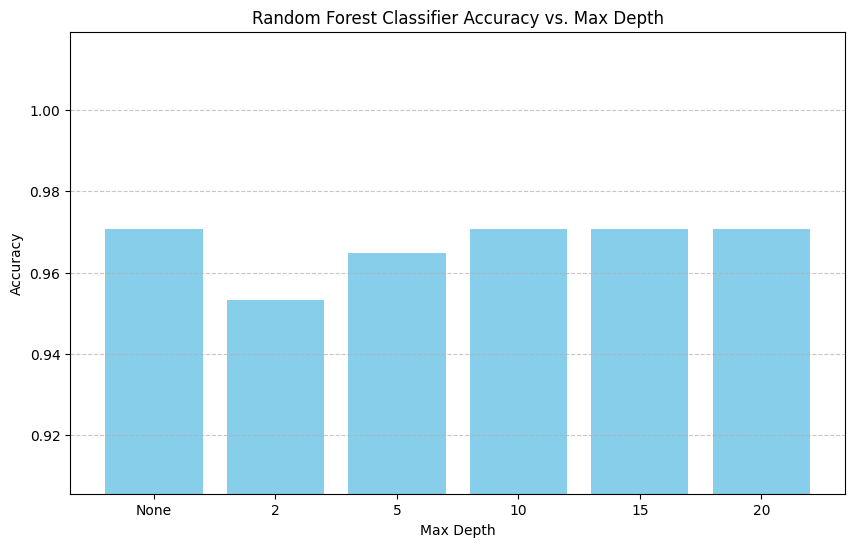


--- Summary ---
The highest accuracy achieved was 0.9708 with max_depth = None.
Interpretation: Allowing trees to grow to their full depth (max_depth=None) yielded the best performance, indicating that the dataset might benefit from complex decision boundaries or that the Random Forest's ensemble nature effectively manages overfitting even with deep individual trees.


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target

# 2. Split the dataset into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

# 3. Define a list of max_depth values to experiment with
max_depth_list = [None, 2, 5, 10, 15, 20]

# 4. Initialize empty lists to store the accuracies and max_depth labels
accuracies = []
labels = []

# 5. Iterate through each max_depth value
print("Analyzing Random Forest Classifier performance with different max_depth values:\n")
for max_depth in max_depth_list:
    # Initialize a RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)

    # Train the classifier
    rf_classifier.fit(X_train_bc, y_train_bc)

    # Make predictions on the test data
    y_pred_bc = rf_classifier.predict(X_test_bc)

    # Calculate the accuracy score and store it
    accuracy = accuracy_score(y_test_bc, y_pred_bc)
    accuracies.append(accuracy)
    labels.append(str(max_depth))
    print(f"  max_depth={str(max_depth).ljust(4)}: Accuracy = {accuracy:.4f}")

# 6. Create a bar plot of accuracy vs. max_depth
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color='skyblue')
plt.title('Random Forest Classifier Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis limit slightly below min accuracy for better visualization
min_accuracy = min(accuracies)
plt.ylim(bottom=max(0, min_accuracy * 0.95)) # Ensure y-axis starts at 0 or close to min_accuracy

plt.show()

# 7. Summarize the findings
max_accuracy_idx = np.argmax(accuracies)
highest_accuracy = accuracies[max_accuracy_idx]
best_max_depth = labels[max_accuracy_idx]

print(f"\n--- Summary ---")
print(f"The highest accuracy achieved was {highest_accuracy:.4f} with max_depth = {best_max_depth}.")

if best_max_depth == 'None':
    print("Interpretation: Allowing trees to grow to their full depth (max_depth=None) yielded the best performance, indicating that the dataset might benefit from complex decision boundaries or that the Random Forest's ensemble nature effectively manages overfitting even with deep individual trees.")
else:
    print(f"Interpretation: A limited max_depth of {best_max_depth} was found to be optimal, suggesting that controlling tree depth helps in generalizing better to unseen data by preventing individual trees from overfitting too much, while still capturing relevant patterns.")



40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance

In [33]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Generate a sample regression dataset
X_reg_comp, y_reg_comp = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# 2. Split data into training and testing sets
X_train_reg_comp, X_test_reg_comp, y_train_reg_comp, y_test_reg_comp = train_test_split(X_reg_comp, y_reg_comp, test_size=0.3, random_state=42)

# --- Bagging Regressor with Decision Tree as base estimator ---
# 3. Initialize a DecisionTreeRegressor as the base estimator
base_estimator_dt = DecisionTreeRegressor(random_state=42)

# 4. Initialize the Bagging Regressor with Decision Tree
bagging_dt_regressor = BaggingRegressor(estimator=base_estimator_dt, n_estimators=100, random_state=42)

# 5. Train the Bagging Regressor (Decision Tree)
bagging_dt_regressor.fit(X_train_reg_comp, y_train_reg_comp)

# 6. Make predictions and calculate MSE for Decision Tree Bagging
y_pred_dt_bagging = bagging_dt_regressor.predict(X_test_reg_comp)
mse_dt_bagging = mean_squared_error(y_test_reg_comp, y_pred_dt_bagging)
print(f"Bagging Regressor (Decision Tree) MSE: {mse_dt_bagging:.4f}")

# --- Bagging Regressor with K-Neighbors as base estimator ---
# 7. Initialize a KNeighborsRegressor as the base estimator
base_estimator_knn = KNeighborsRegressor(n_neighbors=5, n_jobs=-1) # n_jobs=-1 uses all available CPU cores

# 8. Initialize the Bagging Regressor with K-Neighbors
bagging_knn_regressor = BaggingRegressor(estimator=base_estimator_knn, n_estimators=100, random_state=42)

# 9. Train the Bagging Regressor (K-Neighbors)
bagging_knn_regressor.fit(X_train_reg_comp, y_train_reg_comp)

# 10. Make predictions and calculate MSE for K-Neighbors Bagging
y_pred_knn_bagging = bagging_knn_regressor.predict(X_test_reg_comp)
mse_knn_bagging = mean_squared_error(y_test_reg_comp, y_pred_knn_bagging)
print(f"Bagging Regressor (K-Neighbors) MSE: {mse_knn_bagging:.4f}")

# 11. Compare the two calculated MSE scores
print("\n--- Comparison ---")
if mse_dt_bagging < mse_knn_bagging:
    print(f"Bagging Regressor with Decision Tree performed better (lower MSE) with MSE: {mse_dt_bagging:.4f}")
elif mse_knn_bagging < mse_dt_bagging:
    print(f"Bagging Regressor with K-Neighbors performed better (lower MSE) with MSE: {mse_knn_bagging:.4f}")
else:
    print("Both Bagging Regressors performed equally.")

Bagging Regressor (Decision Tree) MSE: 211.5435
Bagging Regressor (K-Neighbors) MSE: 906.3001

--- Comparison ---
Bagging Regressor with Decision Tree performed better (lower MSE) with MSE: 211.5435


41.  Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target

# 2. Split data into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

# 3. Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_bc, y_train_bc)

# 4. Make probability predictions on the test set
# ROC-AUC requires probability scores for the positive class
y_pred_proba_rf = rf_classifier.predict_proba(X_test_bc)[:, 1]

# 5. Calculate and print the ROC-AUC Score
auc_score_rf = roc_auc_score(y_test_bc, y_pred_proba_rf)
print(f"Random Forest Classifier ROC-AUC Score: {auc_score_rf:.4f}")

Random Forest Classifier ROC-AUC Score: 0.9968


42. Train a Bagging Classifier and evaluate its performance using cross-validation

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
import numpy as np

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target

# 2. Initialize a base estimator (Decision Tree Classifier)
base_estimator = DecisionTreeClassifier(random_state=42)

# 3. Initialize the Bagging Classifier
bagging_classifier_cv = BaggingClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

# 4. Perform cross-validation
# cv=5 means 5-fold cross-validation
# scoring='accuracy' specifies the metric to evaluate
cv_scores = cross_val_score(bagging_classifier_cv, X_bc, y_bc, cv=5, scoring='accuracy', n_jobs=-1)

# 5. Print the cross-validation results
print(f"Bagging Classifier Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores):.4f}")

Bagging Classifier Cross-Validation Accuracy Scores: [0.89473684 0.93859649 0.99122807 0.96491228 1.        ]
Mean CV Accuracy: 0.9579
Standard Deviation of CV Accuracy: 0.0382


43. Train a Random Forest Classifier and plot the Precision-Recall curve

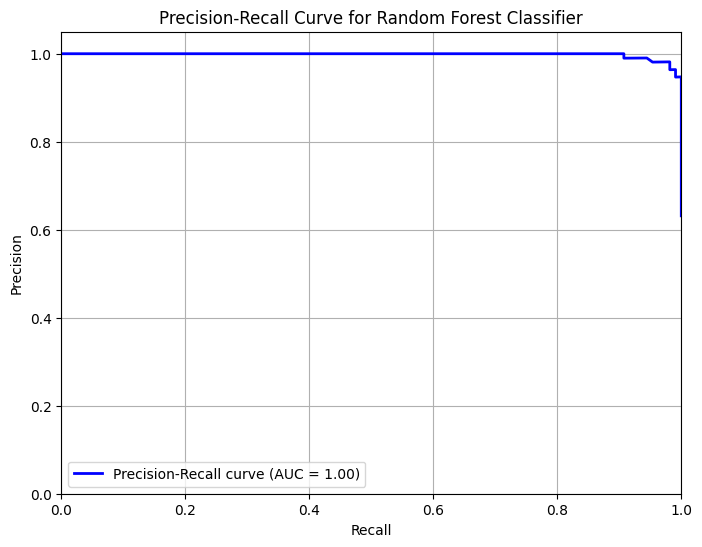

Area Under the Precision-Recall Curve (AUC-PR): 0.9982


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target

# 2. Split data into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

# 3. Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_bc, y_train_bc)

# 4. Predict probabilities on the test set for the positive class
y_pred_proba = rf_classifier.predict_proba(X_test_bc)[:, 1]

# 5. Calculate Precision, Recall, and Thresholds
precision, recall, thresholds = precision_recall_curve(y_test_bc, y_pred_proba)

# 6. Calculate the Area Under the Precision-Recall Curve (AUC-PR)
auc_pr = auc(recall, precision)

# 7. Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.legend(loc='lower left')
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

print(f"Area Under the Precision-Recall Curve (AUC-PR): {auc_pr:.4f}")

44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

In [38]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize base estimators
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
lr_clf = LogisticRegression(solver='liblinear', random_state=42)

# 4. Create a list of estimators for StackingClassifier
estimators = [
    ('rf', rf_clf),
    ('lr', lr_clf)
]

# 5. Initialize the StackingClassifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42))

# 6. Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# 7. Make predictions on the test set
y_pred_stacking = stacking_clf.predict(X_test)

# 8. Calculate and print the accuracy
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {accuracy_stacking:.4f}")

Stacking Classifier Accuracy: 0.9708


45.  Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

Regression dataset generated and split into training and testing sets.
X_train_reg_bootstrap shape: (700, 10)
X_test_reg_bootstrap shape: (300, 10)

Training BaggingRegressor with different max_samples values:
  max_samples=0.1: MSE = 490.0397
  max_samples=0.5: MSE = 237.3290
  max_samples=0.7: MSE = 219.0417
  max_samples=1.0: MSE = 211.5435
  max_samples=50: MSE = 610.6893
  max_samples=100: MSE = 429.6522
  max_samples=200: MSE = 299.3752
  max_samples=700: MSE = 211.5435


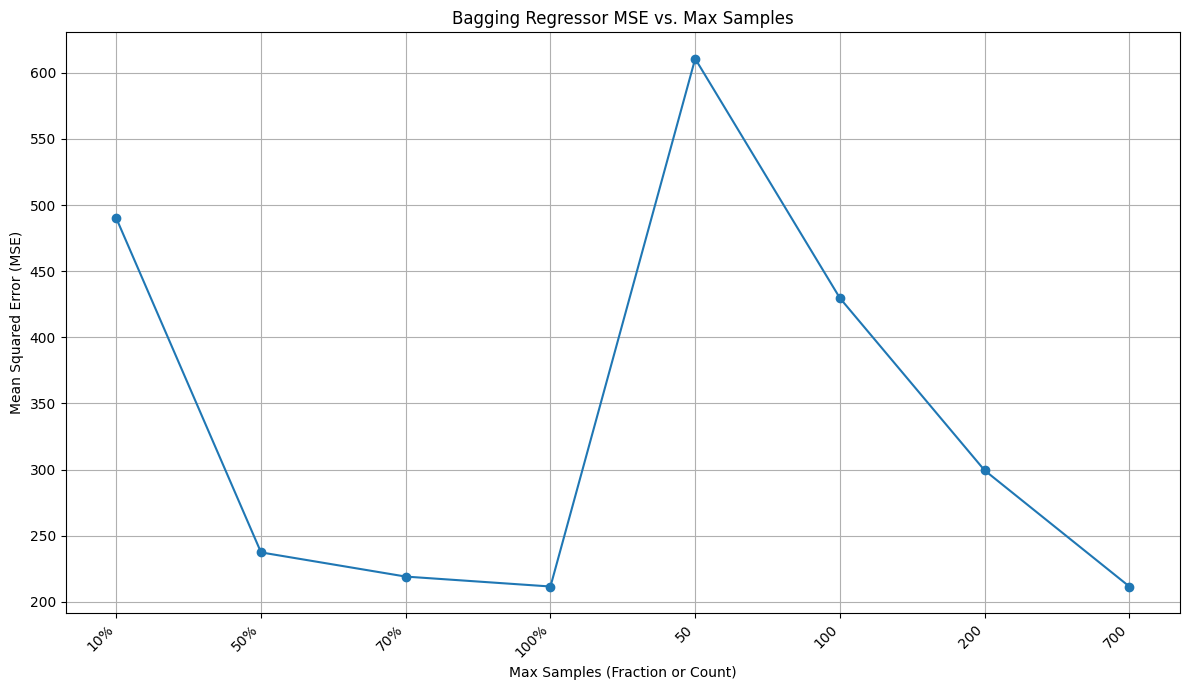


Analysis complete. The plot shows the impact of different `max_samples` values on Bagging Regressor's performance.


In [40]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate a sample regression dataset
X_reg_bootstrap, y_reg_bootstrap = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# 2. Split data into training and testing sets
X_train_reg_bootstrap, X_test_reg_bootstrap, y_train_reg_bootstrap, y_test_reg_bootstrap = train_test_split(X_reg_bootstrap, y_reg_bootstrap, test_size=0.3, random_state=42)

print("Regression dataset generated and split into training and testing sets.")
print(f"X_train_reg_bootstrap shape: {X_train_reg_bootstrap.shape}")
print(f"X_test_reg_bootstrap shape: {X_test_reg_bootstrap.shape}")

# 3. Define a list of max_samples values to experiment with
# Include both fractional and absolute integer values
max_samples_list_bootstrap = [0.1, 0.5, 0.7, 1.0, 50, 100, 200, X_train_reg_bootstrap.shape[0]]

# 4. Initialize empty lists to store the MSE scores and labels
mse_scores_bootstrap = []
labels_bootstrap = []

# 5. Loop through each max_samples value
print("\nTraining BaggingRegressor with different max_samples values:")
for max_samples_val in max_samples_list_bootstrap:
    # Initialize a base estimator (Decision Tree Regressor)
    base_estimator_bootstrap = DecisionTreeRegressor(random_state=42)

    # Initialize the Bagging Regressor with the current max_samples
    # Ensure max_samples is handled correctly (float for fraction, int for count)
    bagging_regressor_bootstrap = BaggingRegressor(estimator=base_estimator_bootstrap,
                                                   n_estimators=100,
                                                   max_samples=max_samples_val,
                                                   random_state=42)

    # Train the Bagging Regressor
    bagging_regressor_bootstrap.fit(X_train_reg_bootstrap, y_train_reg_bootstrap)

    # Make predictions on the test set
    y_pred_reg_bootstrap = bagging_regressor_bootstrap.predict(X_test_reg_bootstrap)

    # Calculate the Mean Squared Error and store it
    mse = mean_squared_error(y_test_reg_bootstrap, y_pred_reg_bootstrap)
    mse_scores_bootstrap.append(mse)

    # Append the string representation for plotting
    if isinstance(max_samples_val, float):
        labels_bootstrap.append(f'{max_samples_val*100:.0f}%')
    else:
        labels_bootstrap.append(str(max_samples_val))

    print(f"  max_samples={max_samples_val}: MSE = {mse:.4f}")

# 6. Create a line plot of MSE vs. max_samples
plt.figure(figsize=(12, 7))
plt.plot(labels_bootstrap, mse_scores_bootstrap, marker='o', linestyle='-')
plt.title('Bagging Regressor MSE vs. Max Samples')
plt.xlabel('Max Samples (Fraction or Count)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nAnalysis complete. The plot shows the impact of different `max_samples` values on Bagging Regressor's performance.")